###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Customer Satisfaction Analysis </span>

The data we have at hand is of passengers and their feedback regarding their flight experience.Each row is one passenger. Apart from the feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class. The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied. The task at hand is to analyze the data and build a model to predict customer satisfaction using all or some of the data we have.

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity
from IPython.display import display

In [2]:
flight_data = pd.read_csv("Flight_data.csv")  # Read the data regarding customer attributes
survey_data = pd.read_csv("Survey_data.csv")   # Feedback data from customers

In [3]:
display(flight_data.head(2))
display(survey_data.head(2))

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0


,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Combining Flight and Survey Data </span>

Since the ID in both datasets signifies customer id, we can combine the data using ID as the key. This will create one single data on which the transformations and EDA can be applied.

In [4]:
data_all=pd.merge(flight_data,survey_data,left_on="ID",right_on="Id",how="inner")

#### Checking if all customer information is present in the data

In [5]:
print('Flight Data:',flight_data.shape)
print('Survey Data:',survey_data.shape)
print('Final Data:',data_all.shape)

Flight Data: (90917, 9)
Survey Data: (90917, 16)
Final Data: (90917, 25)


<b>Findings</b>
- Looks like the count of record is the same across all data frames

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Data Treatment </span>

Checking for outliers, missing values, and data inconsistency

In [6]:
df=data_all.copy()
data_all.isna().sum()

ID                                      0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
Id                                      0
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                       

In [7]:
numeric_cols=[]
categorical_cols=[]

for i in df.columns:
    if df[i].dtypes!=object:
        numeric_cols.append(i)
    else:
        categorical_cols.append(i)

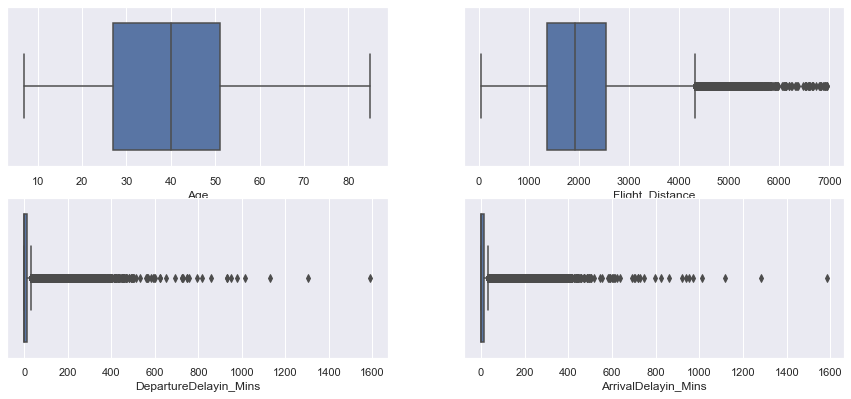

In [8]:
plt.figure(figsize=(15,10))
pos=1
for i in numeric_cols:
    if i not in ['ID','Id']:
        plt.subplot(3,2,pos)
        sns.boxplot(df[i])
        pos+=1

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Missing Value Treatment </span>

Since columns with missing values have ~10% missing records, we can drop them as it doesn't impact the volume of the data significantly. We can do some imputation on the "ArrivalDelayin_Mins" because we have ~250 missing records in this data.

We can impute the categorical columns using the mode value as well. However to keep the process simple we didn't perform other operations.

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') 
df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

In [10]:
df['ArrivalDelayin_Mins'].isna().sum()

0

In [11]:
df.dropna(inplace = True) 

In [12]:
df.isna().sum().sum()

0

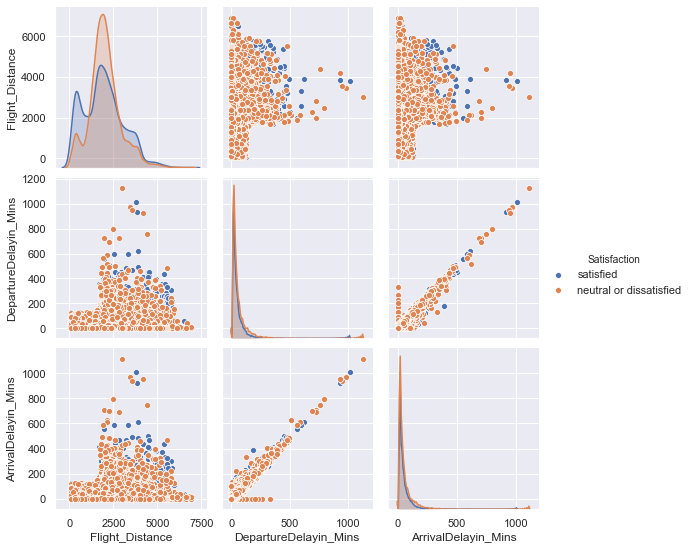

In [13]:
df_req=df[['Flight_Distance','DepartureDelayin_Mins','ArrivalDelayin_Mins','Satisfaction']].copy()
sns.pairplot(df_req,hue='Satisfaction')

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Outlier Treatment </span>

Customers dissatisfaction increases as the delay time increases, hence we can't cap the outliers. We can convert them into categories of High, Medium, Low or keep them as it is build the model and check for accuarcy metrics.

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Correlation Check </span>

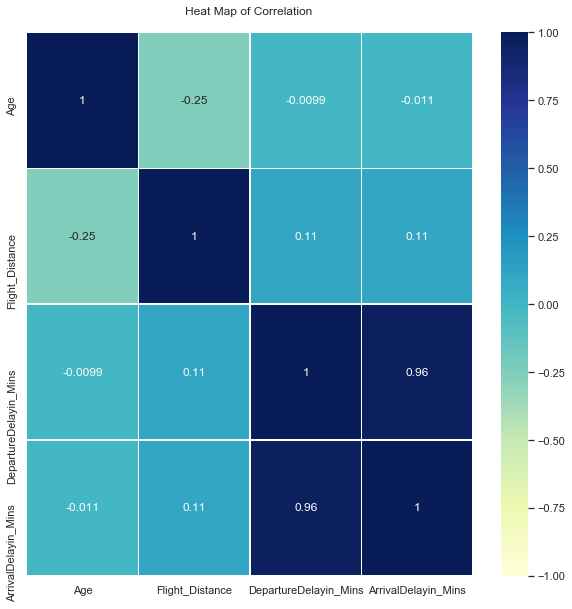

In [14]:
to_drop = ['ID','Id']
df.drop(columns=to_drop,inplace=True)
# # Pairplot using s
corr = df.corr();
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.title('Heat Map of Correlation \n')

sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [15]:
df.drop(columns='DepartureDelayin_Mins',inplace=True)

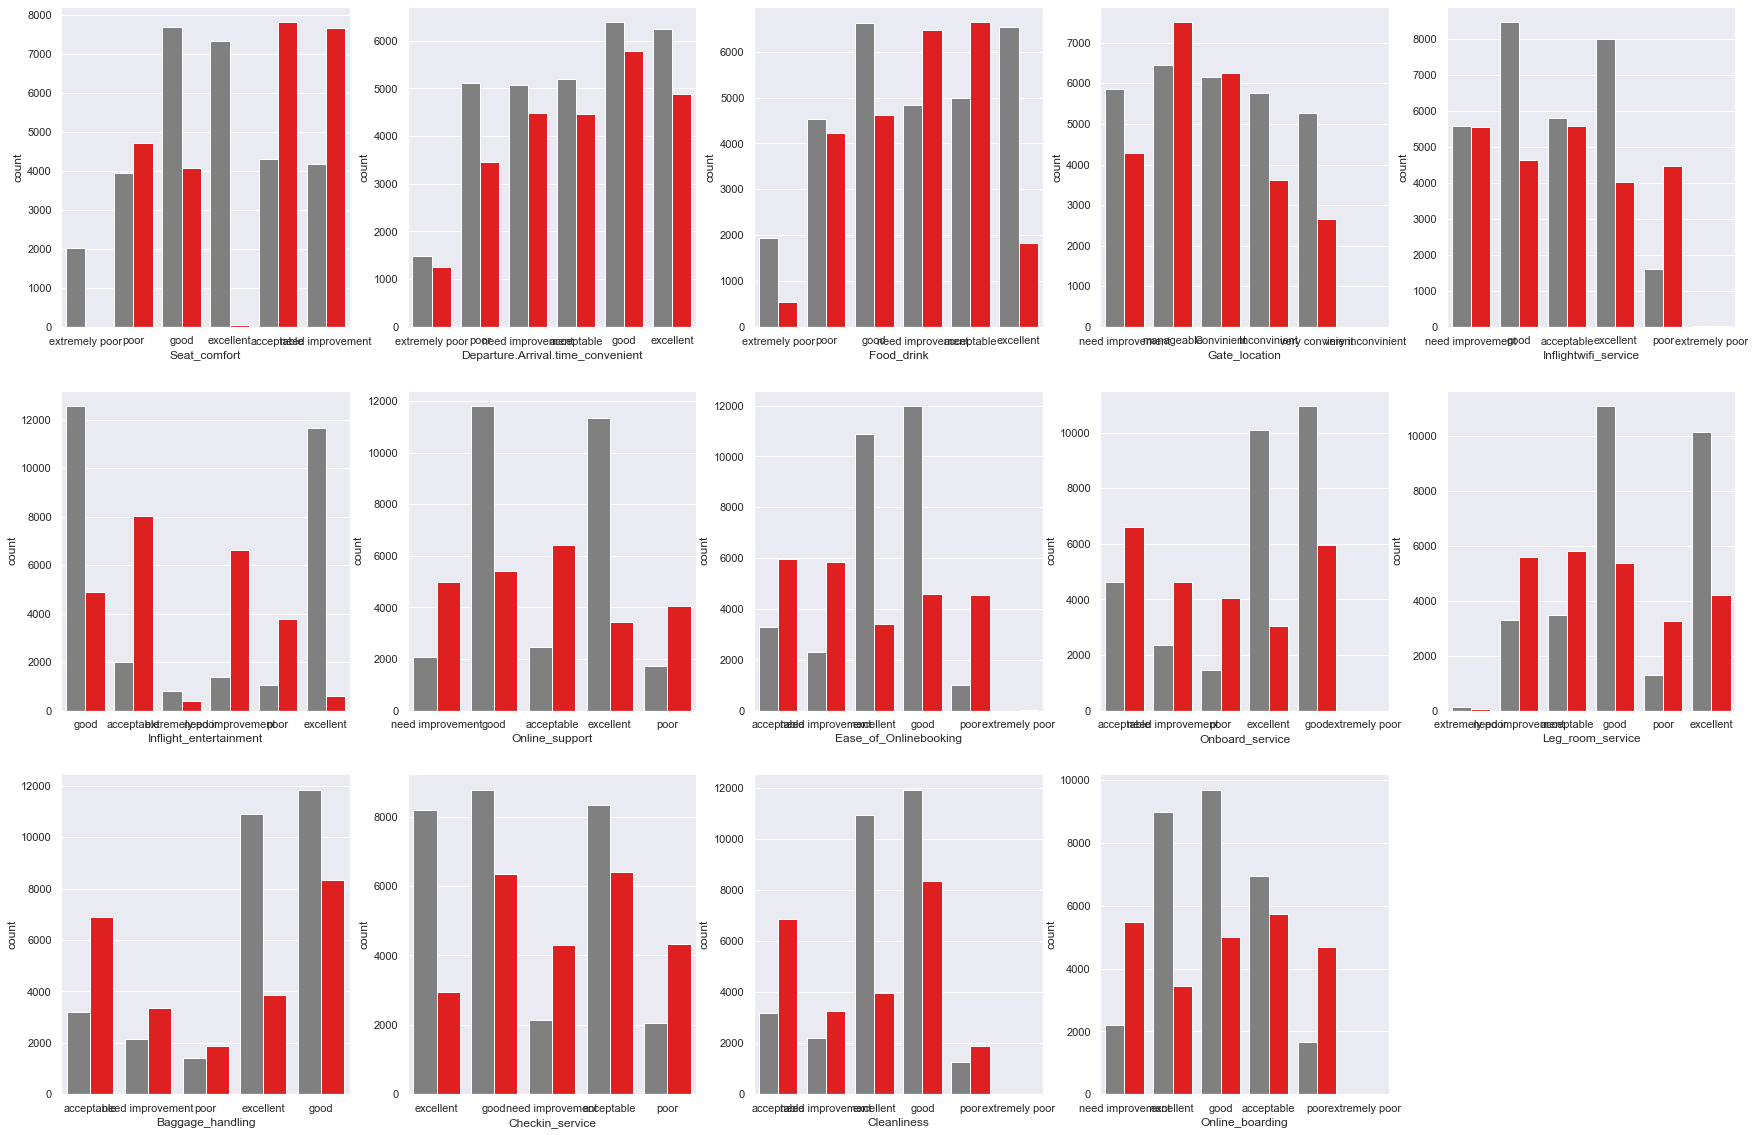

In [16]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'gray','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Data Transformation </span>

In [17]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# cols_to_scale = ['Age','Flight_Distance','ArrivalDelayin_Mins']

# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale].to_numpy())

In [18]:
df.head()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,...,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0.0,satisfied,extremely poor,extremely poor,...,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
3,Female,Loyal Customer,70,Personal Travel,Eco,354,0.0,satisfied,extremely poor,extremely poor,...,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
8,Female,Loyal Customer,58,Personal Travel,Eco,104,48.0,satisfied,extremely poor,extremely poor,...,acceptable,acceptable,acceptable,acceptable,acceptable,extremely poor,poor,need improvement,acceptable,excellent
9,Female,Loyal Customer,34,Personal Travel,Eco,3633,0.0,satisfied,extremely poor,extremely poor,...,need improvement,extremely poor,need improvement,need improvement,acceptable,need improvement,excellent,need improvement,excellent,need improvement
10,Male,Loyal Customer,62,Personal Travel,Eco,1695,0.0,satisfied,extremely poor,extremely poor,...,excellent,extremely poor,excellent,excellent,poor,acceptable,need improvement,need improvement,good,excellent


In [19]:
data_req=pd.get_dummies(df,drop_first=True)

In [20]:
data_req.head()

,Age,Flight_Distance,ArrivalDelayin_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus,Satisfaction_satisfied,Seat_comfort_excellent,...,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,65,265,0.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,70,354,0.0,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8,58,104,48.0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,34,3633,0.0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10,62,1695,0.0,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Model Development </span>

#### Checking Class Imbalance

In [21]:
data_req['Satisfaction_satisfied'].value_counts()
data_pipeline=data_req.copy()

#### Scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['Age','Flight_Distance','ArrivalDelayin_Mins']

data_req[cols_to_scale] = scaler.fit_transform(data_req[cols_to_scale].to_numpy())

In [23]:
data_req.head()

,Age,Flight_Distance,ArrivalDelayin_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus,Satisfaction_satisfied,Seat_comfort_excellent,...,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,1.696619,-1.670402,-0.385908,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2.028069,-1.583817,-0.385908,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8,1.232591,-1.827032,0.840926,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,-0.358365,1.606191,-0.385908,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10,1.497750,-0.279212,-0.385908,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [24]:
data_req['Gender_Male'].value_counts()

0    27447
1    26351
Name: Gender_Male, dtype: int64

In [25]:
X = data_req.drop(columns= 'Satisfaction_satisfied')
y = data_req.Satisfaction_satisfied

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43038, 75), (10760, 75), (43038,), (10760,))

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Logistic Regression </span>

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Using Pipeline </span>

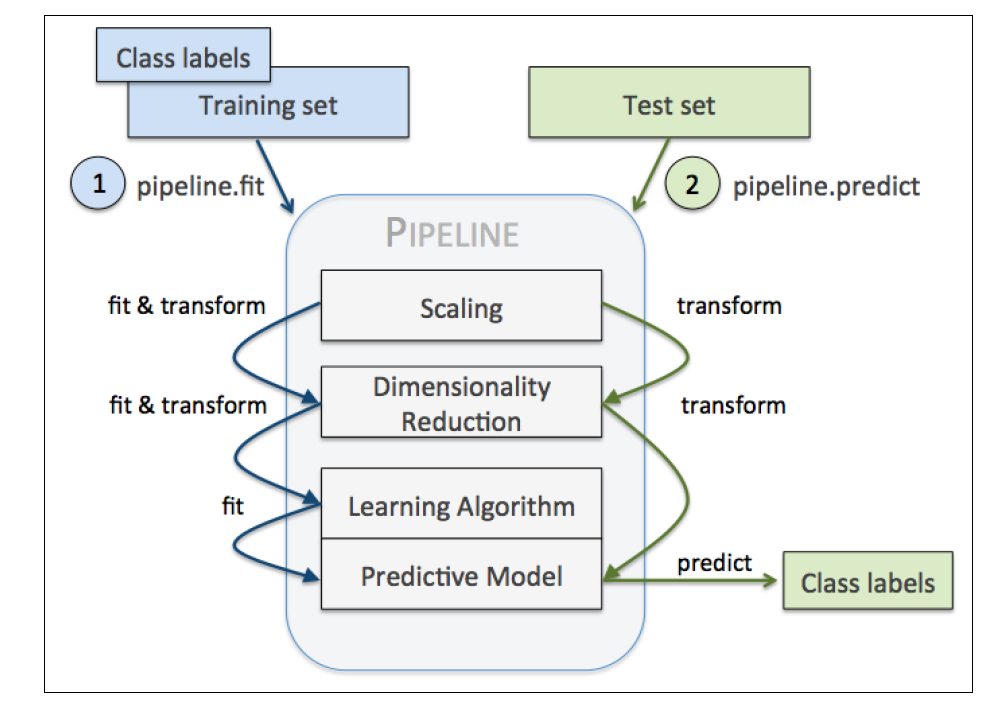

In [29]:
from IPython.display import Image
Image("Pipeline.png", width=700, height=1200)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

In [31]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=0))])

In [32]:
X = data_pipeline.drop(columns= 'Satisfaction_satisfied')
y = data_pipeline.Satisfaction_satisfied

In [33]:
data_pipeline.head()

,Age,Flight_Distance,ArrivalDelayin_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus,Satisfaction_satisfied,Seat_comfort_excellent,...,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,65,265,0.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,70,354,0.0,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8,58,104,48.0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,34,3633,0.0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10,62,1695,0.0,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43038, 75), (10760, 75), (43038,), (10760,))

In [35]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [36]:
pred = pipe_lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = pipe_lr.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[1]=({'Model' : 'Logistic Regression - Pipeline (Scaled)', 'Accuracy' : lr_score, 'Precision' : lr_precision,
                      'True positive rate' : lr_recall, 'True negative rate' : lr_specificity,
                       'False positive rate' :  1-lr_specificity})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099
1,Logistic Regression - Pipeline (Scaled),0.908457,0.919,0.914,0.902,0.098


In [38]:
from sklearn.tree import DecisionTreeClassifier

rf = DecisionTreeClassifier(random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
rf_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
rf_specificity =round(tn/(tn+fp),3) 

result.loc[2] = ['Decision Tree', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099
1,Logistic Regression - Pipeline (Scaled),0.908457,0.919,0.914,0.902,0.098
2,Decision Tree,0.929833,0.933,0.940,0.918,0.082


In [39]:
rf.tree_.max_depth

35

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
rf_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099
1,Logistic Regression - Pipeline (Scaled),0.908457,0.919,0.914,0.902,0.098
2,Decision Tree,0.929833,0.933,0.940,0.918,0.082
3,Random Forest,0.951394,0.962,0.949,0.954,0.046


In [47]:
for i in range(0,100):
    print(rf.estimators_[i].tree_.max_depth, end=",")

35,34,34,38,37,34,35,38,40,37,35,40,35,36,36,35,34,37,36,34,39,35,32,36,38,36,34,36,33,35,36,40,40,36,41,31,39,39,34,34,35,36,39,40,36,37,38,39,41,37,35,37,39,40,36,38,31,37,37,35,35,40,33,37,36,40,37,31,33,38,37,38,33,40,41,36,39,36,36,35,38,34,38,44,39,37,34,35,34,34,36,37,37,33,41,36,37,35,37,39,

In [48]:
from sklearn.model_selection import GridSearchCV

grid = {'bootstrap': [True],
        'max_depth': [35, 40],
        'max_features': ['log2'],
#         'min_samples_leaf': [1, 2, 4],
#         'min_samples_split': [2, 5, 10],
        'n_estimators': [100,150]}

gs = GridSearchCV(estimator = RandomForestClassifier(random_state=1), param_grid = grid, cv = 3, n_jobs = -1, verbose = 2 )

gs.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   11.7s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   19.5s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [35, 40],
                         'max_features': ['log2'], 'n_estimators': [100, 150]},
             verbose=2)

In [49]:
gs.best_estimator_

RandomForestClassifier(max_depth=35, max_features='log2', n_estimators=150,
                       random_state=1)

In [50]:
gs.cv_results_

{'mean_fit_time': array([ 8.34168402, 12.11326027,  7.58636999,  7.38589851]),
 'std_fit_time': array([0.09589335, 0.10546798, 1.24819338, 0.07300337]),
 'mean_score_time': array([0.72805214, 0.96076131, 0.62399689, 0.43783092]),
 'std_score_time': array([0.01485988, 0.04003788, 0.18058955, 0.00355437]),
 'param_bootstrap': masked_array(data=[True, True, True, True],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[35, 35, 40, 40],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['log2', 'log2', 'log2', 'log2'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 100, 150],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'bootstrap': True,


In [51]:
gs.best_score_

0.9432129745806033

In [52]:
forest = RandomForestClassifier(max_depth=35, max_features='log2', n_estimators=150,
                       random_state=1)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest.score(X_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
forest_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
forest_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random forest(tuned)', forest_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099
1,Logistic Regression - Pipeline (Scaled),0.908457,0.919,0.914,0.902,0.098
2,Decision Tree,0.929833,0.933,0.940,0.918,0.082
3,Random Forest,0.951394,0.962,0.949,0.954,0.046
4,Random forest(tuned),0.948048,0.957,0.947,0.949,0.051


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> PipeLine + RandomizedSearchCV </span>

In the snippet below we will try and implement the concept of pipeline and RandomizedSearchCV together. When working with GridSearchCV or RandomizedSearchCV the best parameters are returned based on the average accuarcy score for validation dataset. Hence to include other scoring paramters, refer to the link below.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [57]:
grid = {'rf__bootstrap': [True, False],
        'rf__max_depth': [25, 30, 35, 40],
        'rf__max_features': ['log2', 'sqrt'],
#         'rf__min_samples_leaf': [1, 2, 4],
#         'rf__min_samples_split': [2, 5, 10],
        'rf__n_estimators': [150, 200]
       }

In [58]:
from sklearn.model_selection import RandomizedSearchCV

pipe_lr = Pipeline([('scl', StandardScaler()), ('rf', RandomForestClassifier(random_state=1))])

randomCV = RandomizedSearchCV(estimator = pipe_lr, param_distributions = grid, cv = 3,
                              n_iter=5, random_state=1) #default cv = 3

In [59]:
randomCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scl', StandardScaler()),
                                             ('rf',
                                              RandomForestClassifier(random_state=1))]),
                   n_iter=5,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [25, 30, 35, 40],
                                        'rf__max_features': ['log2', 'sqrt'],
                                        'rf__n_estimators': [150, 200]},
                   random_state=1)

In [60]:
randomCV.best_params_

{'rf__n_estimators': 200,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 30,
 'rf__bootstrap': False}

In [61]:
randomCV.cv_results_

{'mean_fit_time': array([11.57988048, 14.09140515, 15.40050793, 15.2277658 , 20.11742067]),
 'std_fit_time': array([2.89664442, 0.30069669, 0.10339831, 0.21410931, 0.49386705]),
 'mean_score_time': array([0.78633348, 1.20743314, 0.9705685 , 0.96592569, 1.28217769]),
 'std_score_time': array([0.3222413 , 0.0059208 , 0.00465348, 0.00449131, 0.01409109]),
 'param_rf__n_estimators': masked_array(data=[200, 200, 150, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_rf__max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_rf__max_depth': masked_array(data=[35, 25, 30, 25, 30],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_rf__bootstrap': masked_array(data=[False, True, False, False, False],
              mask=[

In [62]:
forest = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=200,
                       random_state=1)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest.score(X_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
forest_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
forest_specificity =round(tn/(tn+fp),3) 

result.loc[5] = ['Random forest(tuned) with RS', forest_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.907714,0.918,0.913,0.901,0.099
1,Logistic Regression - Pipeline (Scaled),0.908457,0.919,0.914,0.902,0.098
2,Decision Tree,0.929833,0.933,0.940,0.918,0.082
3,Random Forest,0.951394,0.962,0.949,0.954,0.046
4,Random forest(tuned),0.948048,0.957,0.947,0.949,0.051
5,Random forest(tuned) with RS,0.951208,0.960,0.950,0.953,0.047
